In [1]:
import sys
sys.path.append("Y:\Python\Mega_IT")

from yjk_module.preprocessing import *
from yjk_module.ml_module import *

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

- 위스콘신 유방암

In [3]:
origin1 = my_read_excel("./data/breast-cancer-wisconsin.xlsx", index_col="id", categories=["diagnosis"])

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  area_se 

In [4]:
df1 = my_standard_scaler(origin1, 'diagnosis')
df1_2 = my_labelling(df1, 'diagnosis')

In [5]:
x_train, x_test, y_train, y_test = my_train_test_split(df1_2, 'diagnosis')

[교차검증]
+----+-------+------------+-----------+-------------------+
|    |     C |   max_iter | penalty   |   mean_test_score |
|----+-------+------------+-----------+-------------------|
|  7 |   0.1 |        500 | l2        |          0.978022 |
| 10 |     1 |        500 | l2        |          0.978022 |
| 13 |    10 |        500 | l2        |          0.971429 |
| 16 |   100 |        500 | l2        |          0.967033 |
|  4 |  0.01 |        500 | l2        |          0.945055 |
|  1 | 0.001 |        500 | l2        |          0.883516 |
+----+-------+------------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.869719 |  

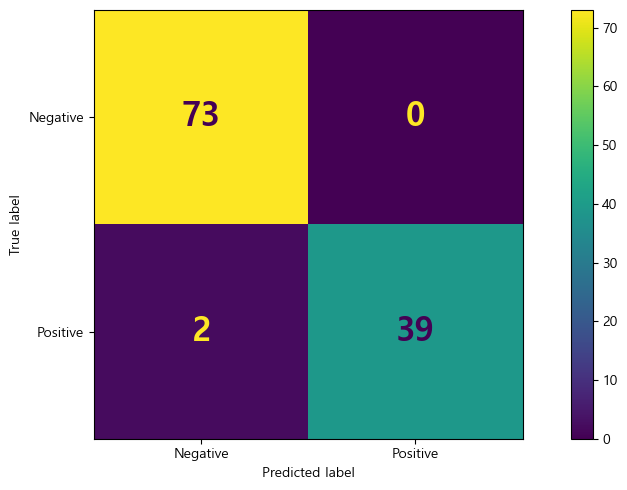

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


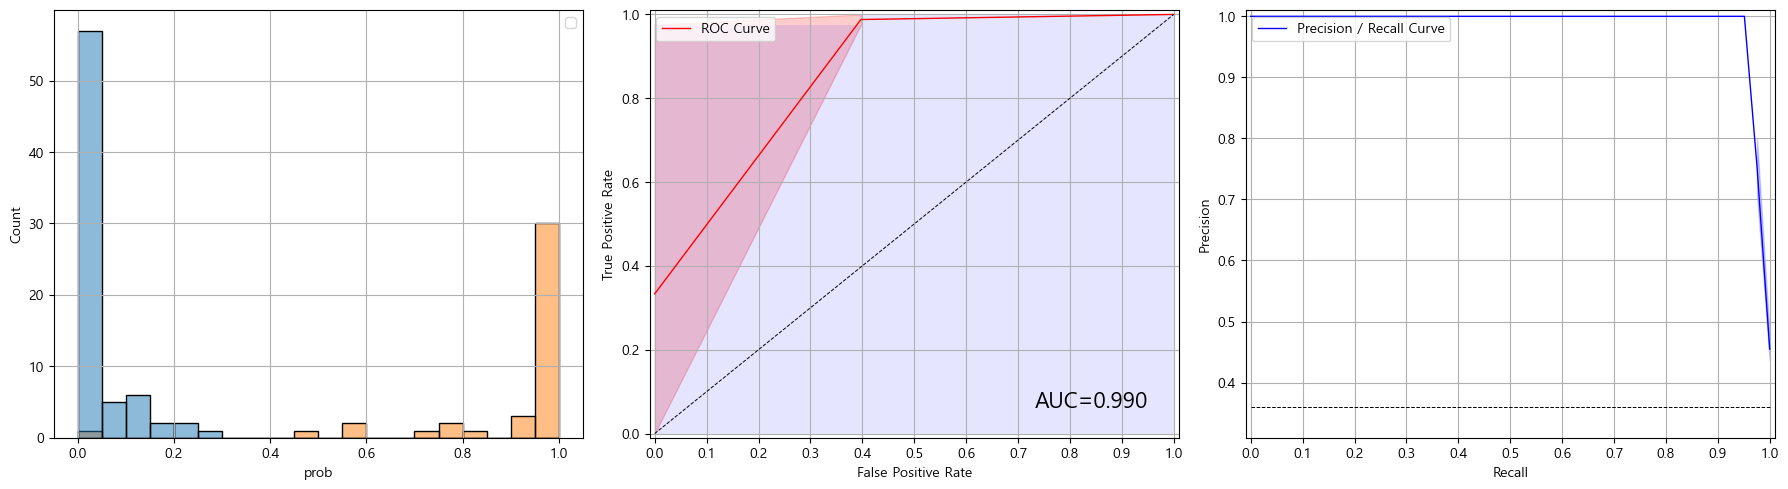


[학습곡선]


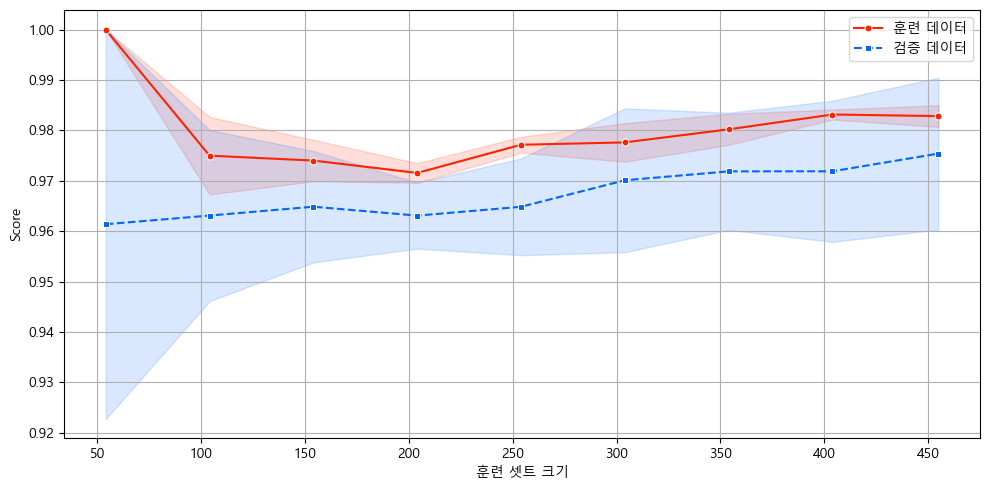

+----+------------+-------------------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수                |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+-------------------------+--------------------+------------+---------+------------+---------+------------|
|  0 | diagnosis  | radius_mean             |             0.3976 |     74.092 |  0.0054 |      0.996 | 7154.91 |     1.4883 |
|  1 | diagnosis  | texture_mean            |             0.4098 |      3.177 |   0.129 |      0.897 | 10.9017 |     1.5066 |
|  2 | diagnosis  | perimeter_mean          |             0.3861 |     73.769 |  0.0052 |      0.996 | 8652.28 |     1.4712 |
|  3 | diagnosis  | area_mean               |             0.3794 |      29.39 |  0.0129 |       0.99 | 710.047 |     1.4614 |
|  4 | diagnosis  | smoothness_mean         |             0.1662 |      3.064 |  0.0542 |      0.957 | 13.9662 |     1.1808 |
|  5 | diagnos

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

In [6]:
my_logistic_classification(x_train, y_train, x_test, y_test)

[교차검증]
+----+-----------+---------------+-----------+-------------------+
|    | metric    |   n_neighbors | weights   |   mean_test_score |
|----+-----------+---------------+-----------+-------------------|
|  6 | manhattan |             3 | uniform   |           0.96044 |
|  7 | manhattan |             3 | distance  |           0.96044 |
|  4 | euclidean |             7 | uniform   |          0.958242 |
|  0 | euclidean |             3 | uniform   |          0.956044 |
|  1 | euclidean |             3 | distance  |          0.956044 |
|  5 | euclidean |             7 | distance  |          0.956044 |
|  2 | euclidean |             5 | uniform   |          0.953846 |
|  3 | euclidean |             5 | distance  |          0.953846 |
| 10 | manhattan |             7 | uniform   |          0.953846 |
| 11 | manhattan |             7 | distance  |          0.953846 |
|  8 | manhattan |             5 | uniform   |          0.951648 |
|  9 | manhattan |             5 | distance  |         

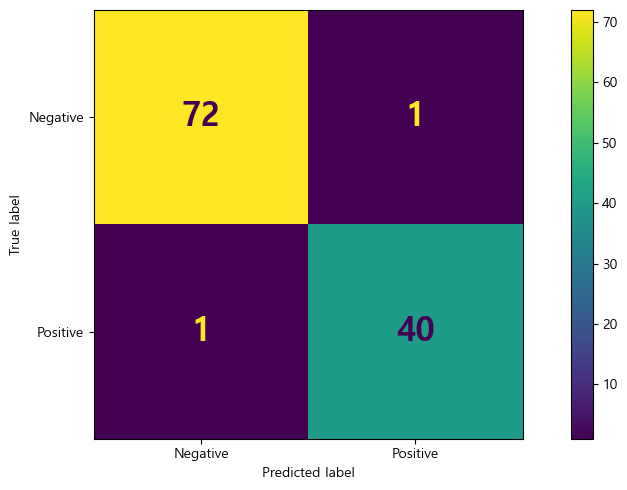

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


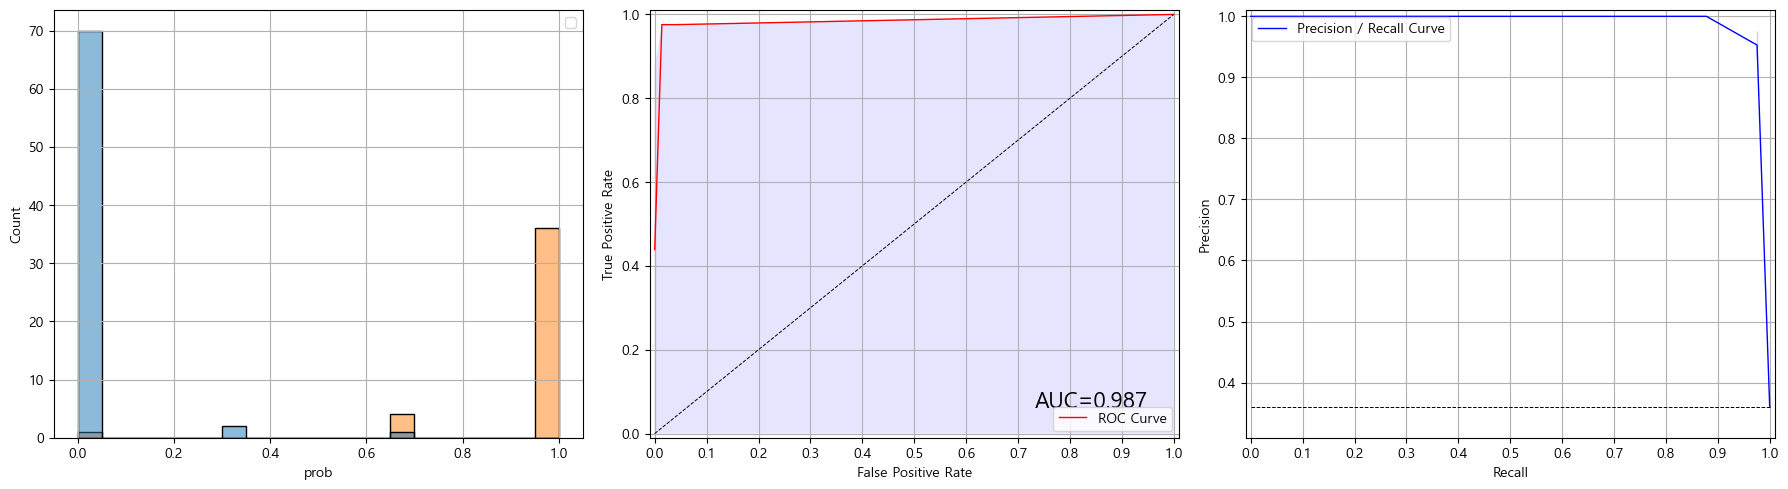


[학습곡선]


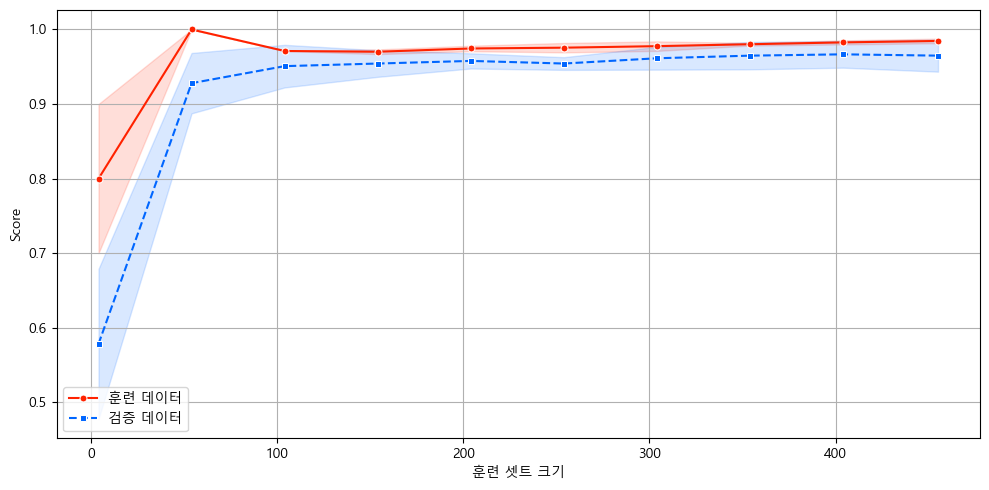

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=3)

In [7]:
my_knn_classification(x_train, y_train, x_test, y_test)

- 두 모델의 성능이 비슷함

In [8]:
support = YjkClassifierSupport()

사용 가능한 모델 : ['LogisticRegression', 'SGDClassifier', 'KNeighborsClassifier']


In [9]:
%%time

result_df = yjk_classifier_multi_gridsearch(support, x_train, x_test, y_train, y_test, randomized_search = False,
                                           models = None)
result_df

CPU times: total: 45.5 s
Wall time: 39.2 s


,best_model,best_param,accuracy_train,accuracy_test
model_name,,,,
LogisticRegression,"LogisticRegression(C=0.1, n_jobs=-1)","{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}",0.978019,0.982456
SGDClassifier,"SGDClassifier(alpha=0.01, loss='log_loss', max...","{'alpha': 0.01, 'loss': 'log_loss', 'max_iter'...",0.980193,0.982456
KNeighborsClassifier,"KNeighborsClassifier(n_jobs=-1, n_neighbors=7)","{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}",0.962657,0.973684


In [10]:
origin2 = my_read_excel("./data/titanic.xlsx", index_col='PassengerId', categories=['Survived', 'Pclass', 'Sex', 'Embarked'], info=False)
df2 = origin2.copy()

In [11]:
mean_age_df = df2[['Survived','Age']].groupby('Survived').mean()
mean_age_df

,Age
Survived,
0,30.510986
1,28.931079


In [12]:
for i in mean_age_df.index:
    mean_age = round(mean_age_df.loc[i]['Age'], 0)
    #print(mean_age)

    expr = (df2['Survived'] == i) & (df2['Age'].isna())
    df2.loc[expr, 'Age'] = df2.loc[expr, 'Age'].fillna(mean_age)

df2['Age'].isna().sum()

0

In [13]:
def set_xticks(ax):
    global df2
    min = int(df2['Age'].min())
    max = int(df2['Age'].max())

    x = list(range(min, max+1, 2))
    ax.set_xticks(x)
    ax.set_xticklabels(x)
    ax.set_xlim(min, max)

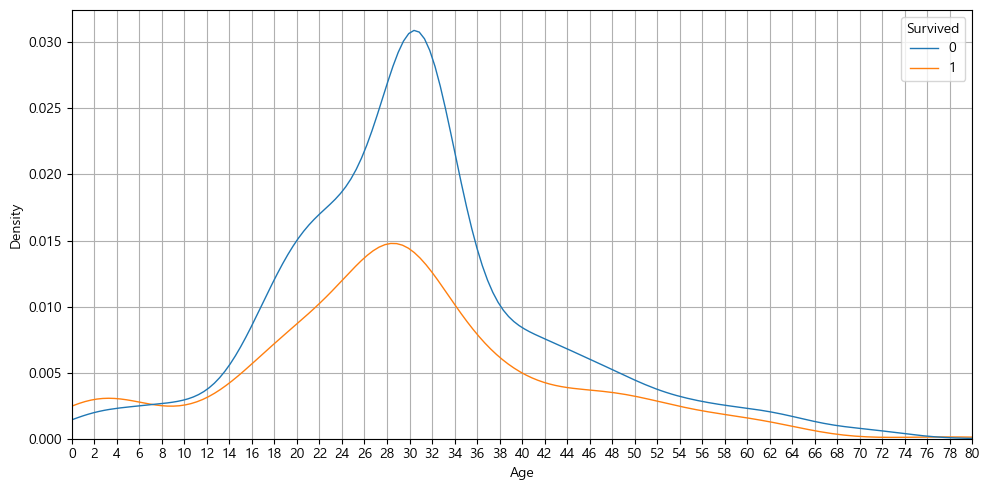

In [14]:
my_kdeplot(df2, 'Age', hue='Survived', dpi=100, callback=set_xticks)

In [15]:
hist, bins = np.histogram(df2['Age'], bins=5)
print(hist)
print(np.round(bins, 0))

[134 787 269 106  13]
[ 0. 16. 32. 48. 64. 80.]


In [16]:
df2_2 = df2.copy()
df2_2.loc[ df2_2['Age'] <= 16, "Age"] = 0
df2_2.loc[ (df2_2['Age'] > 16) & (df2_2['Age'] <= 32), "Age"] = 1
df2_2.loc[ (df2_2['Age'] > 32) & (df2_2['Age'] <= 48), "Age"] = 2
df2_2.loc[ (df2_2['Age'] > 48) & (df2_2['Age'] <= 64), "Age"] = 3
df2_2.loc[ df2_2['Age'] > 64, "Age"] = 4

In [17]:
# 데이터 타입이 float라 함은 해당 값이 결측치라는 의미 --> 객실이 없다는 뜻
df2_2['Has_Cabin'] = df2_2['Cabin'].apply(lambda x:  0 if type(x) == float else 1)
df2_2['Has_Cabin'].value_counts()

Has_Cabin
0    1014
1     295
Name: count, dtype: int64

In [18]:
df2_2['FamilySize'] = df2_2['SibSp'] + df2_2['Parch'] + 1

In [19]:
df2_2['IsAlone'] = 0
df2_2.loc[df2_2['FamilySize'] == 1, 'IsAlone'] = 1

In [20]:
most_embarked_df = df2_2[['Survived','Embarked']].groupby('Survived').agg(Series.mode)
most_embarked_df

,Embarked
Survived,
0,S
1,S


In [21]:
for i in most_embarked_df.index:
    most = most_embarked_df.loc[i]['Embarked']
    #print(most)

    expr = (df2_2['Survived'] == i) & (df2_2['Embarked'].isna())
    #print(expr)

    df2_2.loc[expr, 'Embarked'] = df2_2.loc[expr, 'Embarked'].fillna(most)

df2_2['Embarked'].isna().sum()

0

In [22]:
mean_fare_df = df2_2[['Survived','Fare']].groupby('Survived').mean()
mean_fare_df

,Fare
Survived,
0,23.879124
1,48.811497


In [23]:
for i in mean_fare_df.index:
    mean_fare = mean_fare_df.loc[i]['Fare']
    #print(mean_fare)

    expr = (df2_2['Survived'] == i) & (df2_2['Fare'].isna())
    #print(expr)

    df2_2.loc[expr, 'Fare'] = df2_2.loc[expr, 'Fare'].fillna(mean_fare)

df2_2['Fare'].isna().sum()

0

In [24]:
import re

In [25]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    
    if title_search:
        return title_search.group(1)
    
    return ""

In [26]:
df2_2['Title'] = df2_2['Name'].apply(get_title)
df2_2['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [27]:
df2_2['Title'] = df2_2['Title'].replace(['Rev', 'Dr', 
                'Mlle', 'Major', 'Col', 'Countess', 'Capt', 'Ms', 
                'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer', 'Dona'], "Rare")

df2_2['Title'].value_counts()

Title
Mr        757
Miss      260
Mrs       197
Master     61
Rare       34
Name: count, dtype: int64

In [28]:
df2_3 = my_labelling(df2_2, 'Title', 'Embarked', 'Sex')

In [29]:
df2_3.loc[ df2_3['Fare'] <= 7.9, "Fare"] = 0
df2_3.loc[ (df2_2['Fare'] > 7.9) & (df2_3['Fare'] <= 14.5), "Fare"] = 1
df2_3.loc[ (df2_3['Fare'] > 14.5) & (df2_3['Fare'] <= 31.3), "Fare"] = 2
df2_3.loc[ df2_3['Fare'] > 31.3, "Fare"] = 3

In [30]:
drop_elements = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
df2_4 = df2_3.drop(drop_elements, axis = 1)

In [31]:
df2_4['Survived'] = df2_4['Survived'].astype('int')
x_train, x_test, y_train, y_test = my_train_test_split(df2_4, yname='Survived')

[교차검증]
+----+-------+------------+-----------+-------------------+
|    |     C |   max_iter | penalty   |   mean_test_score |
|----+-------+------------+-----------+-------------------|
| 10 |     1 |        500 | l2        |          0.852896 |
| 13 |    10 |        500 | l2        |          0.852896 |
| 16 |   100 |        500 | l2        |          0.852896 |
|  7 |   0.1 |        500 | l2        |           0.84812 |
|  4 |  0.01 |        500 | l2        |          0.780314 |
|  1 | 0.001 |        500 | l2        |           0.62273 |
+----+-------+------------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.440417 |  

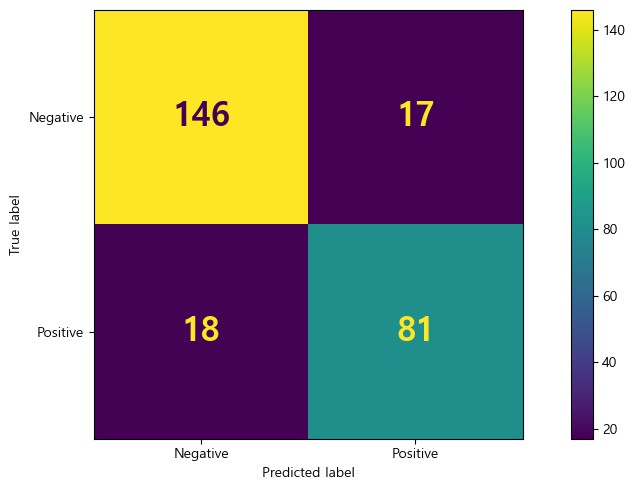

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


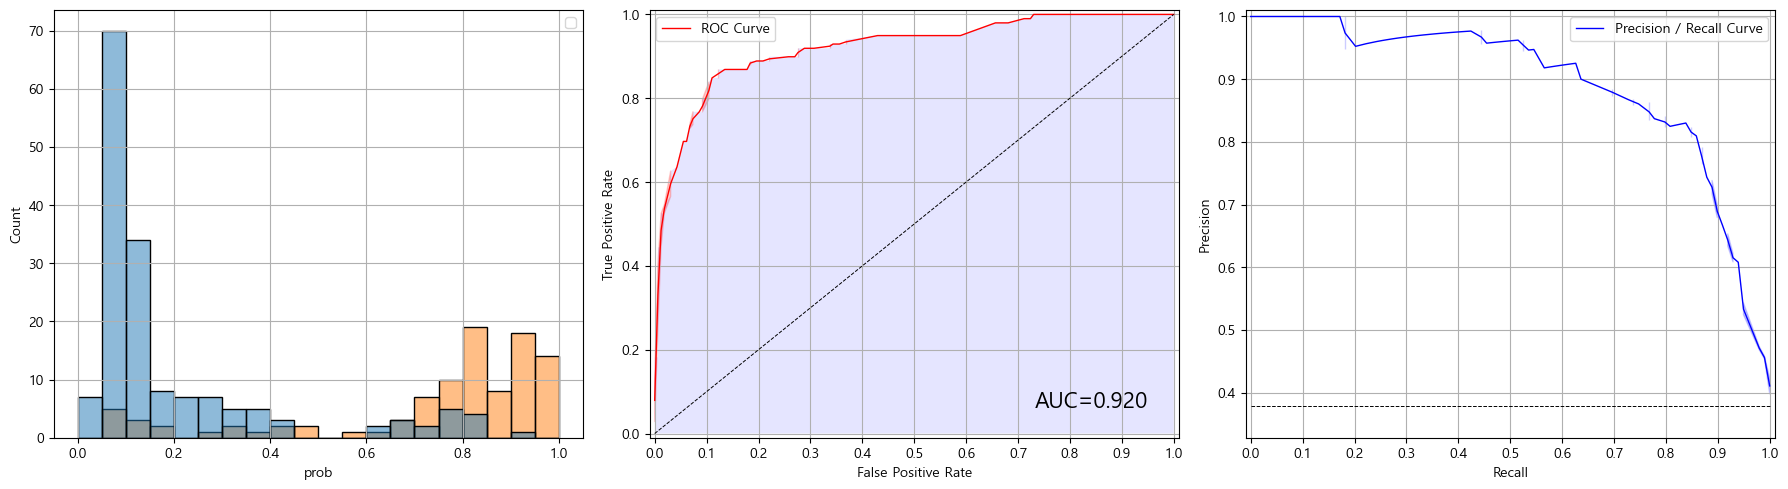


[학습곡선]


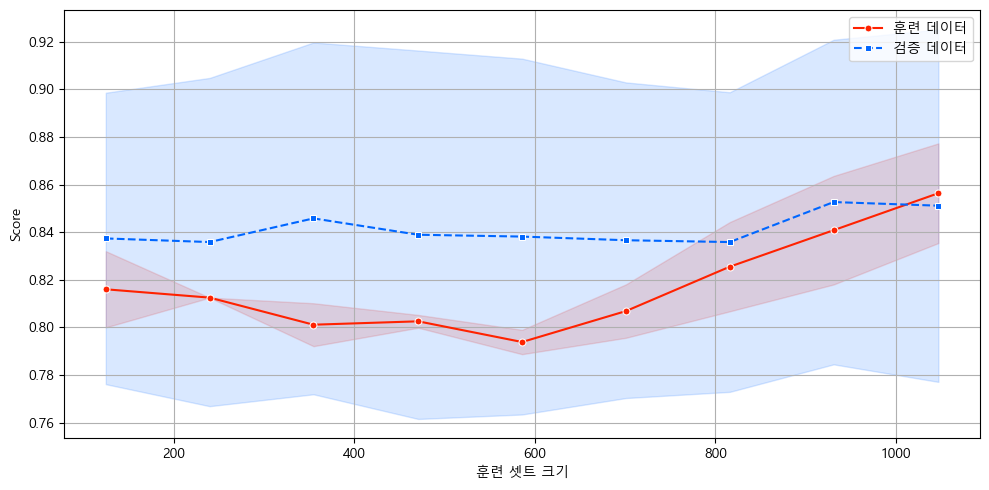

+----+------------+------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+------------+--------------------+------------+---------+------------+---------+------------|
|  0 | Survived   | Pclass     |            -0.4416 |      0.399 | -1.1058 |      0.269 |  13.374 |      0.643 |
|  1 | Survived   | Sex        |            -3.5132 |      0.397 | -8.8545 |          0 | 2.83156 |     0.0298 |
|  2 | Survived   | Age        |            -0.3014 |      0.278 |  -1.084 |      0.278 | 5.05085 |     0.7398 |
|  3 | Survived   | Fare       |              0.314 |      0.295 |  1.0652 |      0.287 | 5.71113 |     1.3689 |
|  4 | Survived   | Embarked   |            -0.0949 |      0.236 | -0.4023 |      0.687 | 5.05385 |     0.9095 |
|  5 | Survived   | Has_Cabin  |             0.4964 |       0.58 |  0.8562 |      0.392 | 2.23078 |     1.6427 |
|  6 

In [32]:
logi_m = my_logistic_classification(x_train, y_train, x_test, y_test)

[교차검증]
+----+-----------+---------------+-----------+-------------------+
|    | metric    |   n_neighbors | weights   |   mean_test_score |
|----+-----------+---------------+-----------+-------------------|
|  8 | manhattan |             5 | uniform   |          0.842411 |
| 10 | manhattan |             7 | uniform   |          0.836687 |
|  6 | manhattan |             3 | uniform   |          0.835721 |
|  2 | euclidean |             5 | uniform   |          0.831902 |
| 11 | manhattan |             7 | distance  |          0.829979 |
|  4 | euclidean |             7 | uniform   |          0.829032 |
|  9 | manhattan |             5 | distance  |          0.829018 |
|  7 | manhattan |             3 | distance  |           0.82807 |
|  5 | euclidean |             7 | distance  |          0.825186 |
|  0 | euclidean |             3 | uniform   |          0.824261 |
|  3 | euclidean |             5 | distance  |          0.824242 |
|  1 | euclidean |             3 | distance  |         

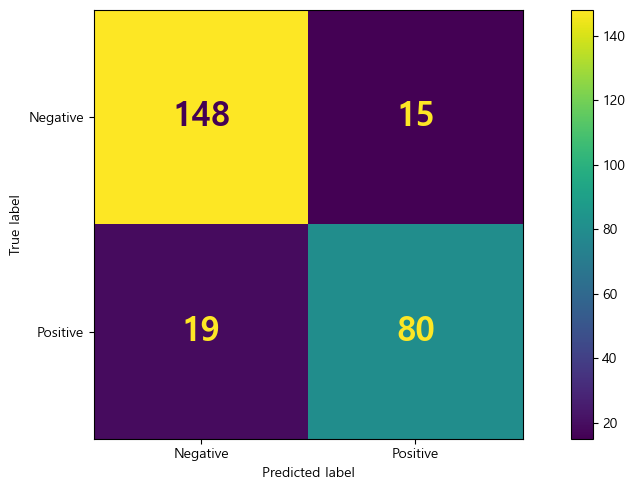

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


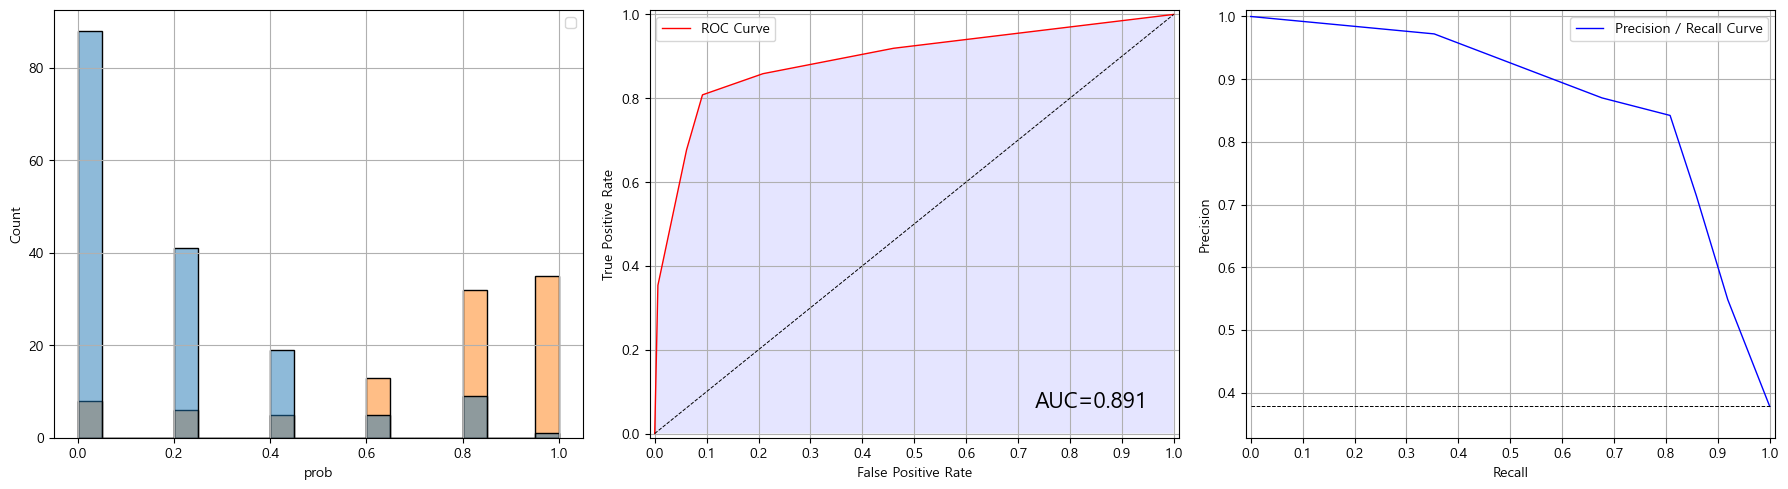


[학습곡선]


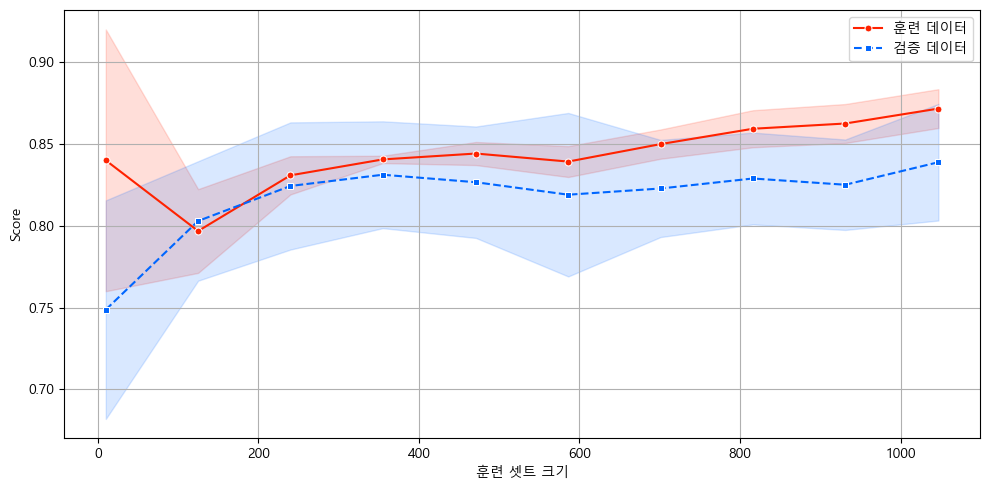

In [33]:
knn_m = my_knn_classification(x_train, y_train, x_test, y_test)

- KNN의 성능이 더 좋았음

In [34]:
support = YjkClassifierSupport()

사용 가능한 모델 : ['LogisticRegression', 'SGDClassifier', 'KNeighborsClassifier']


In [ ]:
%%time

result_df = yjk_classifier_multi_gridsearch(support, x_train, x_test, y_train, y_test, randomized_search = False,
                                           models = None, metrics = 'accuracy')
result_df

In [36]:
knn_m.score(x_test, y_test)

0.8702290076335878

In [37]:
logi_m.score(x_test, y_test)

0.8664122137404581

In [50]:
support = YjkClassifierSupport()

사용 가능한 모델 : ['LogisticRegression', 'SGDClassifier', 'KNeighborsClassifier']


In [51]:
support.call_model('SGDClassifier', return_model = False)

[SGDClassifier의 파라미터]
+--------------+-----------------------------------------------------------+-----------------------------------+
| 파라미터명   | 파라미터 노트                                             | 파라미터 범위                     |
|--------------+-----------------------------------------------------------+-----------------------------------|
| loss         | 손실함수 지정, 기본은 hinge, 예시 외 다수 존재            | ['hinge', 'log_loss', 'huber']    |
| penalty      | 규제의 종류를 지정, 기본값은 l2                           | [None, 'l1', 'l2', 'elasticnet']  |
| alpha        | 규제의 강도를 지정, 범위는 0 ~ 무한대, 로그스케일로 지정  | [0.0001, 0.001, 0.01, 0.1, 1, 10] |
| max_iter     | 수행할 최대 에포크 횟수, 기본 1000                        | [100, 300, 500, 1000]             |
| tol          | 성능향상이 안될 경우 학습을 종료하는 민감도 값, 기본 1e-3 | [0.0001, 0.001, 0.01]             |
+--------------+-----------------------------------------------------------+-----------------------------------+


In [52]:
support.get_params()

{'loss': ['hinge', 'log_loss', 'huber'],
 'penalty': [None, 'l1', 'l2', 'elasticnet'],
 'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
 'max_iter': [100, 300, 500, 1000],
 'tol': [0.0001, 0.001, 0.01]}